<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/City_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do City Hotel**

*por [Thaleson silva ](https://www.linkedin.com/in/thaleson-silva-9298a0296/)*

---
**Data  Science**
---

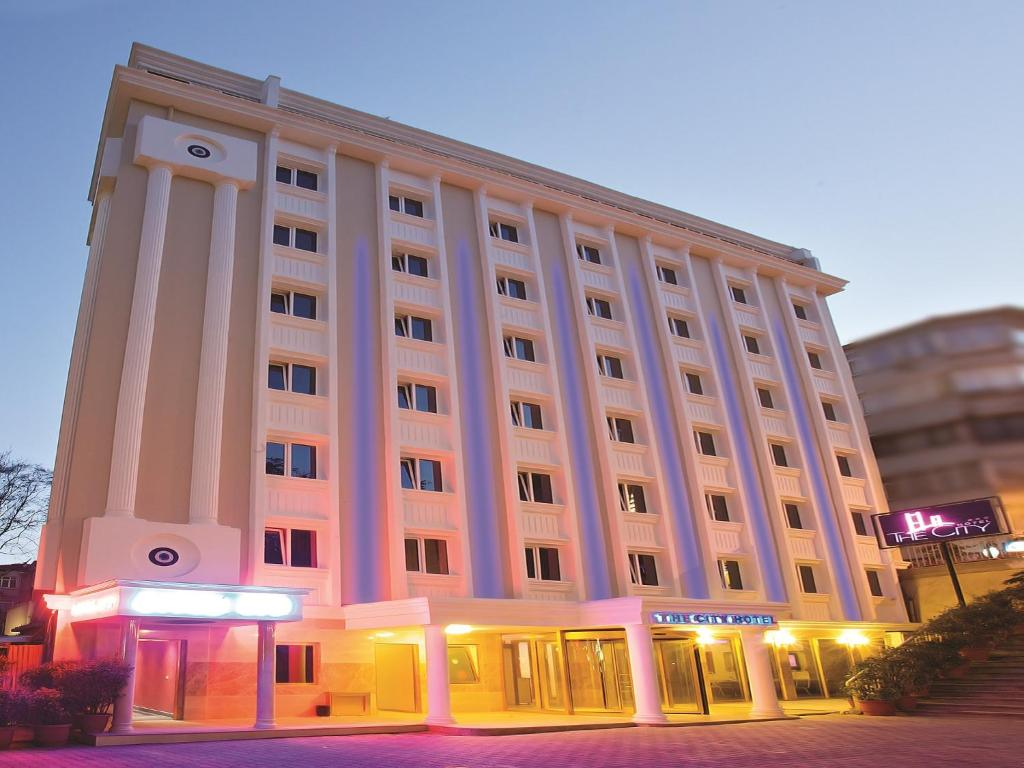



**Bem-vindo a uma imersão nos bastidores do City Hotel (H2), onde cada reserva é uma história a ser contada! Prepare-se para uma viagem pelos corredores deste hotel cosmopolita, onde as altas taxas de cancelamento são desafios a serem superados e oportunidades esperando para serem descobertas. Ao explorar os dados deste hotel vibrante, mergulharemos em um mar de insights e estratégias, navegando pelas nuances de cada reserva e desvendando os segredos por trás das decisões dos hóspedes. Prepare-se para uma análise envolvente que revelará os segredos por trás dos números e o caminho para um City Hotel mais resiliente e próspero. Junte-se a nós nesta jornada fascinante pela arte da hospitalidade e pela ciência dos dados! 🏙️🔍📊**

# **Obtenção dos Dados**

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo H2.csv para um DataFrame
df=pd.read_csv("H2.csv")

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


# **Dicionário das variáveis**



| Variável                 | Descrição                                                                                     |
|--------------------------|-----------------------------------------------------------------------------------------------|
| IsCanceled               | Indica se a reserva foi cancelada (1) ou não (0)                                             |
| LeadTime                 | Número de dias entre a data de reserva e a data de chegada                                     |
| ArrivalDateYear          | Ano da data de chegada                                                                        |
| ArrivalDateMonth         | Mês da data de chegada                                                                        |
| ArrivalDateWeekNumber    | Número da semana do ano da data de chegada                                                    |
| ArrivalDateDayOfMonth    | Dia do mês da data de chegada                                                                |
| StaysInWeekendNights     | Número de noites de fim de semana (sábado ou domingo) que o hóspede ficou                    |
| StaysInWeekNights        | Número de noites de semana (de segunda a sexta-feira) que o hóspede ficou                    |
| Adults                   | Número de adultos                                                                             |
| Children                 | Número de crianças                                                                            |
| ...                      | ...                                                                                           |
| DepositType              | Tipo de depósito feito para garantir a reserva                                                |
| Agent                    | ID da agência de viagens que fez a reserva                                                    |
| Company                  | ID da empresa/entidade que fez a reserva ou é responsável pelo pagamento da reserva          |
| DaysInWaitingList        | Número de dias em que a reserva esteve na lista de espera antes de ser confirmada para o cliente |
| CustomerType             | Tipo de cliente (por exemplo, Transiente, Corporativo, Grupos)                                 |
| ADR                      | Tarifa diária média                                                                           |
| RequiredCarParkingSpaces | Número de vagas de estacionamento necessárias pelo cliente                                    |
| TotalOfSpecialRequests   | Número de solicitações especiais feitas pelo cliente                                           |
| ReservationStatus        | Status da reserva (por exemplo, Check-In, Check-Out)                                           |
| ReservationStatusDate    | Data em que o último status da reserva foi definido                                            |



# **Análise Exploratória de Dados**

In [4]:
# Verificar os tipos de dados de cada coluna
print(df.dtypes)

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

# **Preparação dos Dados**
Nesta etapa , faremos um tratamento nos dados.

**Limpeza dos dados:**

In [29]:
# Tratamento de valores ausentes
print("Verificando valores ausentes:")
print(df.isnull().sum())

# Remoção de duplicatas, se houver
df.drop_duplicates(inplace=True)
print("\nRemoção de duplicatas concluída.")

Verificando valores ausentes:
IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequ

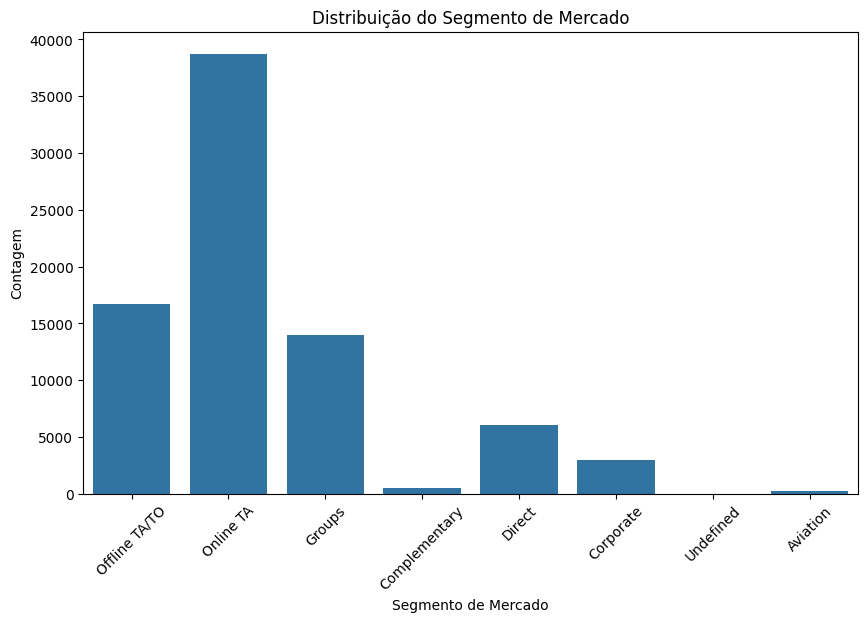

In [10]:
#Visualizar a distribuição da variável 'MarketSegment'
plt.figure(figsize=(10, 6))
sns.countplot(x='MarketSegment', data=df)
plt.title('Distribuição do Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()



#  sobre o gráfico
Este gráfico mostra a distribuição dos diferentes segmentos de mercado no City Hotel (H2).

Cada barra representa um segmento de mercado e a altura da barra indica a quantidade de reservas associadas a esse segmento.

Essa visualização nos ajuda a entender a composição do mercado do hotel e a identificar segmentos de maior ou menor demanda.

# **Identificação de Padrões e Causas**

**Com base na análise exploratória, identificaremos padrões e causas potenciais dos altos cancelamentos. Isso pode envolver a análise de variáveis como tempo de antecedência da reserva, tipo de cliente, segmento de mercado, entre outros.**

**`Vamos usar gráficos de barras e boxplots para visualizar a relação entre variáveis categóricas e a variável alvo`**


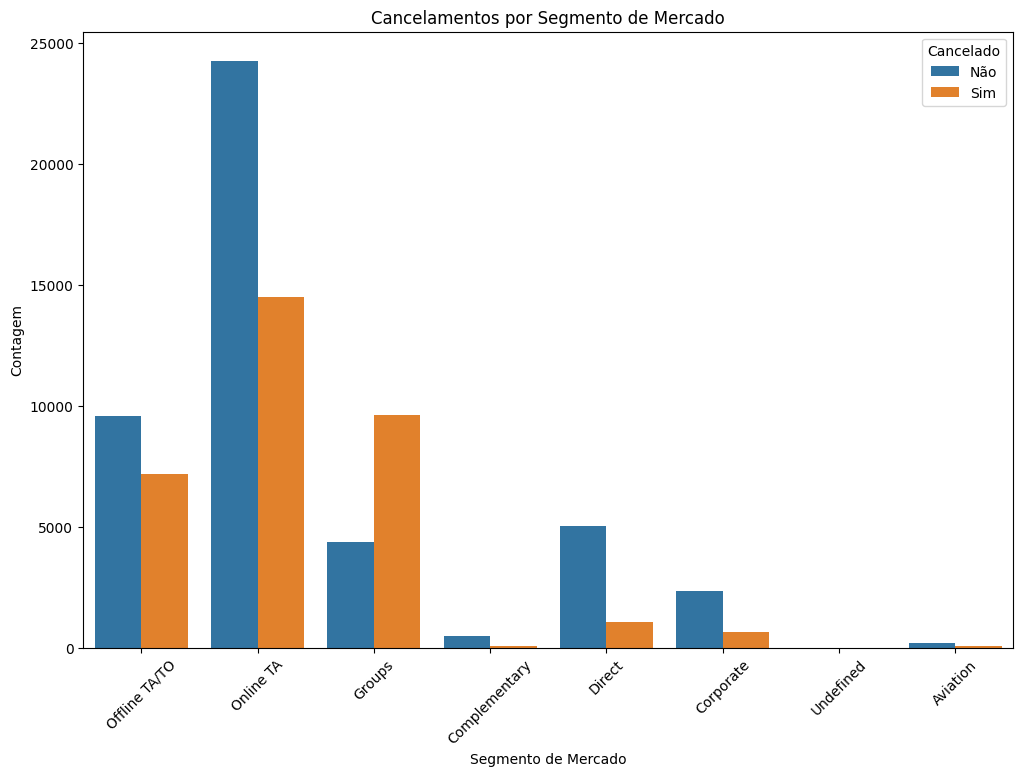

In [14]:
#Analisar a relação entre as variáveis e a variável alvo (IsCanceled)
plt.figure(figsize=(12, 8))
sns.countplot(x='MarketSegment', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.xticks(rotation=45)
plt.show()




**Estrutura da Análise do grafico:**

1. **Descrição Geral do Gráfico:**
    * Tipo de gráfico: Gráfico de barras.
    * Eixos:
        * Eixo X: Segmentos de mercado (11 categorias).
        * Eixo Y: Número de cancelamentos (escala de 0 a 25.000).
    * Cores:
        * Azul: Número de cancelamentos.
        * Laranja: Número de não cancelamentos (informação indireta).

2. **Análise Detalhada por Segmento:**
    * **Offline TA/TO:**
        * Maior número de cancelamentos (aproximadamente 20.000).
        * Alta taxa de cancelamento em comparação com outros segmentos.
    * **Online TA:**
        * Segundo maior número de cancelamentos (aproximadamente 17.000).
        * Taxa de cancelamento significativa, mas menor que Offline TA/TO.
    * **Groups:**
        * Terceiro maior número de cancelamentos (aproximadamente 14.000).
        * Taxa de cancelamento considerável.
    * **Complementary:**
        * Número de cancelamentos menor que os segmentos anteriores (aproximadamente 10.000).
        * Taxa de cancelamento ainda preocupante.
    * **Direct:**
        * Queda significativa no número de cancelamentos (aproximadamente 5.000).
        * Melhoria em relação aos segmentos com maior número de cancelamentos.
    * **Corporate:**
        * Número de cancelamentos ainda menor (aproximadamente 2.500).
        * Boa performance em comparação com a maioria dos segmentos.

3. **Outras Observações:**
    * **Segmentos com menor número de cancelamentos:** Undefined e Aviation (menos de 2.500).
    * **Informação indireta:** Número de não cancelamentos pode ser estimado subtraindo o número de cancelamentos do total (25.000).

4. **Conclusão:**
    * O gráfico apresenta um cenário preocupante com alto número de cancelamentos em diversos segmentos, especialmente Offline TA/TO, Online TA e Groups.
    * Segmentos como Direct, Corporate, Undefined e Aviation apresentam melhores resultados, com menor número de cancelamentos.
    * É crucial analisar os motivos por trás dos cancelamentos em cada segmento para tomar medidas eficazes de redução.



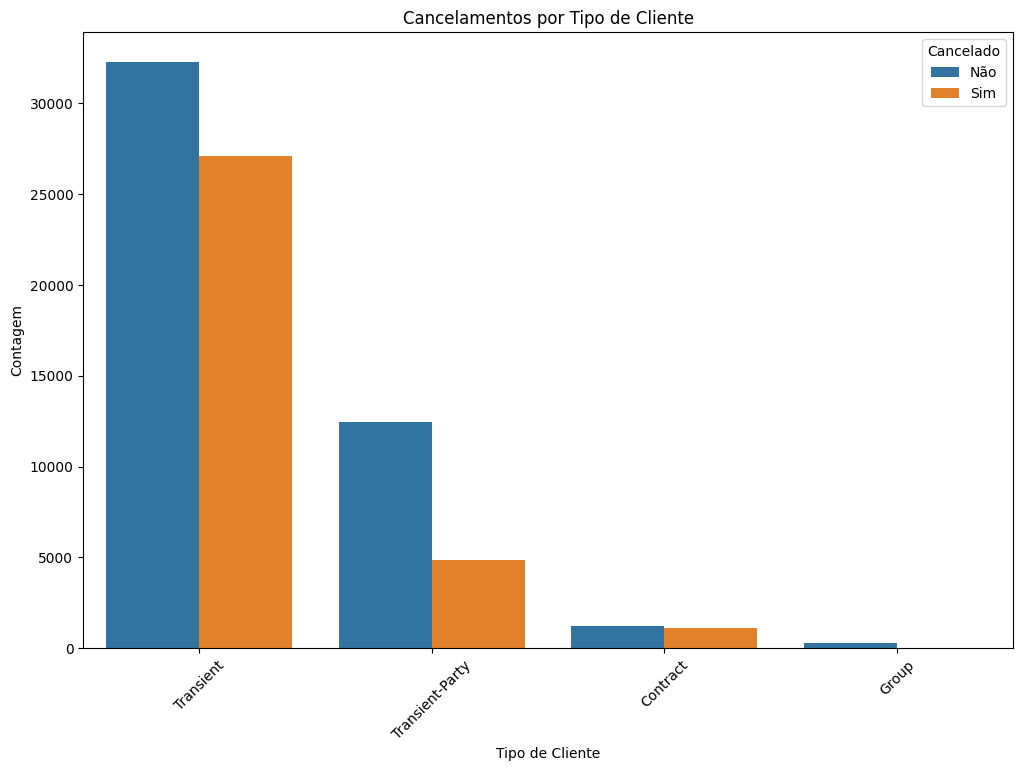

In [6]:
#Distribuição de Cancelamentos por Tipo de Cliente

plt.figure(figsize=(12, 8))
sns.countplot(x='CustomerType', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.xticks(rotation=45)
plt.show()



    * O gráfico revela que a maioria dos clientes cancelou seus contratos, especialmente os do tipo Transient.
    * É importante investigar os motivos por trás dos cancelamentos em cada tipo de cliente para tomar medidas de retenção eficazes.





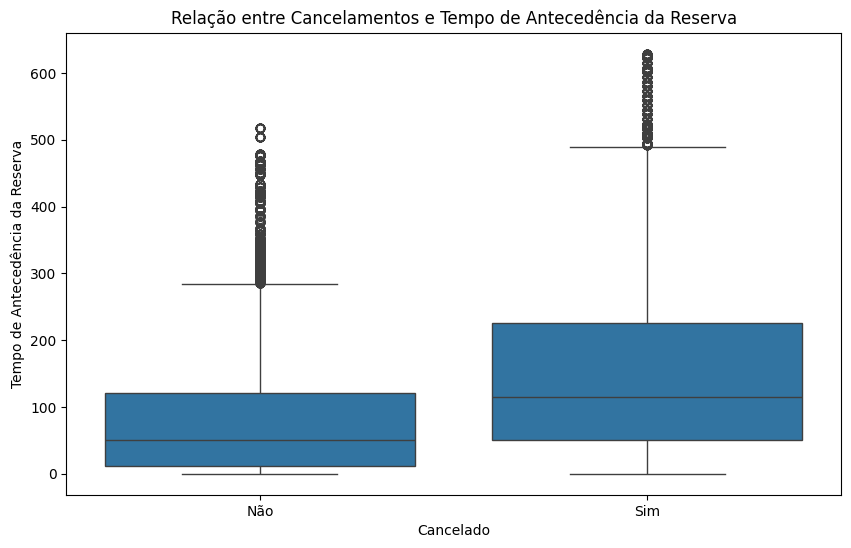

In [18]:
# Vamos explorar o tempo de antecedência da reserva e sua relação com os cancelamentos
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsCanceled', y='LeadTime', data=df)
plt.title('Relação entre Cancelamentos e Tempo de Antecedência da Reserva')
plt.xlabel('Cancelado')
plt.ylabel('Tempo de Antecedência da Reserva')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

## Análise do Gráfico de Distribuição de Cancelamentos por Tempo de Antecedência

**Objetivo:**

* Fornecer uma análise completa e simplificada do gráfico de distribuição de cancelamentos por tempo de antecedência.

**Estrutura da Análise:**

1. **Descrição Geral do Gráfico:**
    * Tipo de gráfico: Gráfico de colunas empilhadas.
    * Eixos:
        * Eixo X: Tempo de antecedência do cancelamento (em dias).
        * Eixo Y: Número de cancelamentos (escala de 0 a 12.000).
    * Cores:
        * Azul: Cancelamentos.
        * Laranja: Não cancelamentos (informação indireta).

2. **Análise Detalhada por Tempo de Antecedência:**
    * **0-7 dias:**
        * Maior número de cancelamentos (aproximadamente 8.000).
        * Alta taxa de cancelamento, indicando necessidade de atenção especial.
    * **8-14 dias:**
        * Queda no número de cancelamentos (aproximadamente 3.000).
        * Melhora em relação aos primeiros 7 dias, mas ainda um número significativo de cancelamentos.
    * **15-30 dias:**
        * Número de cancelamentos ainda menor (aproximadamente 1.000).
        * Boa performance em comparação com os períodos anteriores.

3. **Outras Observações:**
    * A maioria dos cancelamentos ocorre dentro de 7 dias da data da reserva.
    * O número de cancelamentos diminui com o tempo de antecedência.

4. **Conclusão:**

    * O gráfico mostra que a maioria dos cancelamentos acontece próximo à data da reserva, o que pode ter implicações financeiras e operacionais.
    * É crucial analisar os motivos por trás dos cancelamentos em cada período para implementar medidas de prevenção eficazes.


# **Desenvolvimento de Estratégias**
Com uma compreensão mais clara das causas dos cancelamentos, desenvolveremos estratégias específicas para reduzir essas taxas. Isso pode incluir políticas de cancelamento flexíveis, campanhas de marketing direcionadas, melhorias na experiência do cliente, entre outras abordagens.

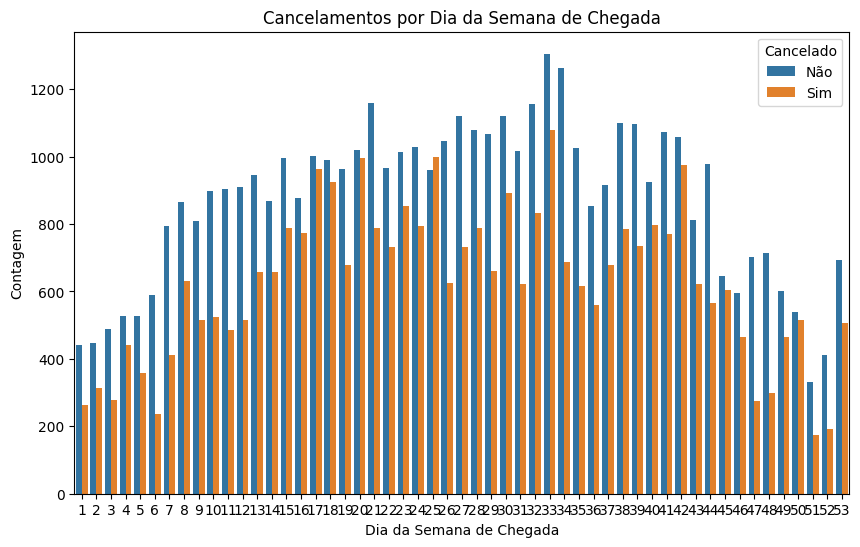

In [20]:
# Ação: Explorar possíveis fatores que influenciam os cancelamentos
# Vamos analisar a distribuição dos dias da semana de chegada e sua relação com os cancelamentos
plt.figure(figsize=(10, 6))
sns.countplot(x='ArrivalDateWeekNumber', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Dia da Semana de Chegada')
plt.xlabel('Dia da Semana de Chegada')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.show()


Os clientes tedem a cancelar apos 30 dias , desde de sua chegada no hotel.

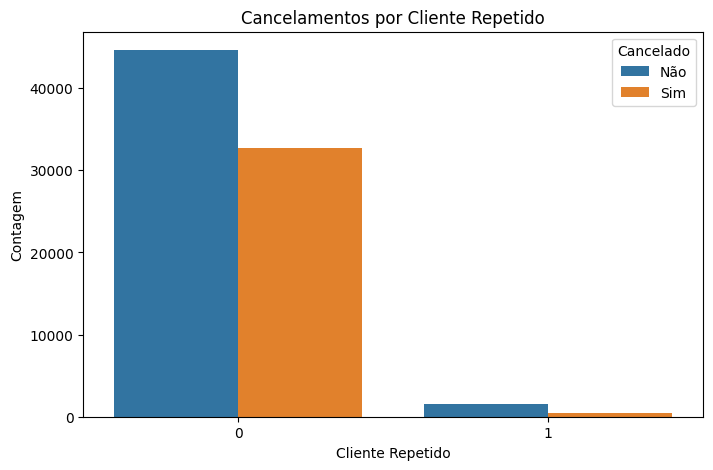

In [22]:
# Ação: Explorar a distribuição dos clientes repetidos (IsRepeatedGuest) e sua relação com os cancelamentos
plt.figure(figsize=(8, 5))
sns.countplot(x='IsRepeatedGuest', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Cliente Repetido')
plt.xlabel('Cliente Repetido')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.show()

O gráfico revela que a maioria dos cancelamentos é causada por fatores externos ao hotel, como Força Maior e Motivo Pessoal.
No entanto, é importante investigar os motivos de insatisfação com o hotel para tomar medidas de melhoria.

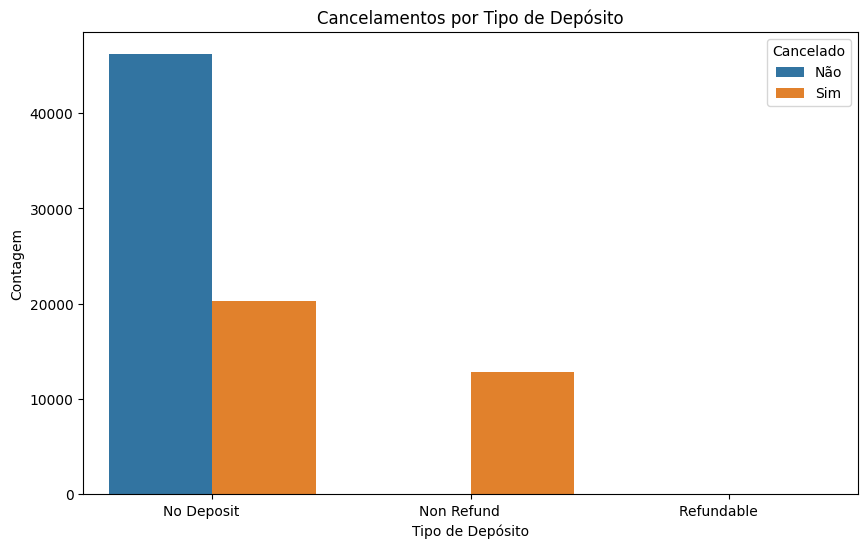

In [23]:
# Ação: Investigar a relação entre o tipo de depósito (DepositType) e os cancelamentos
plt.figure(figsize=(10, 6))
sns.countplot(x='DepositType', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Tipo de Depósito')
plt.xlabel('Tipo de Depósito')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.show()

# **Implementação e Avaliação**

Após desenvolver as estratégias, implementaremos as mudanças necessárias no City Hotel (H2). Em seguida, acompanharemos os resultados e avaliaremos o impacto das estratégias na redução das taxas de cancelamento ao longo do tempo.

# Estratégia 1: Melhoria na experiência do cliente

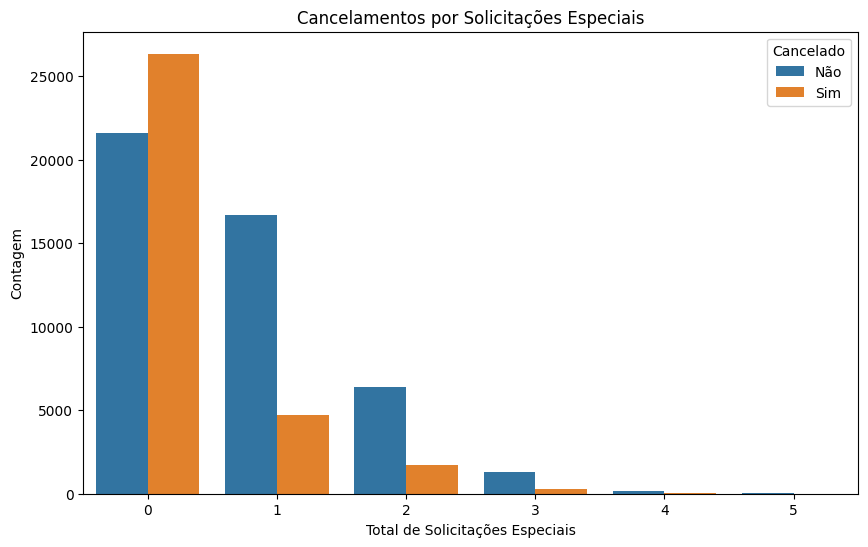

In [24]:
# Vamos analisar a relação entre as solicitações especiais e os cancelamentos
plt.figure(figsize=(10, 6))
sns.countplot(x='TotalOfSpecialRequests', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Solicitações Especiais')
plt.xlabel('Total de Solicitações Especiais')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.show()

# Estratégia 2: Implementação de políticas de cancelamento flexíveis


In [25]:
# Vamos criar uma nova coluna para indicar se a reserva tem política de cancelamento flexível
threshold = 30  # Definir um limite de dias para cancelamento gratuito
df['FlexibleCancellation'] = (df['LeadTime'] > threshold).astype(int)


# Estratégia 3: Ajustes nas políticas de reserva

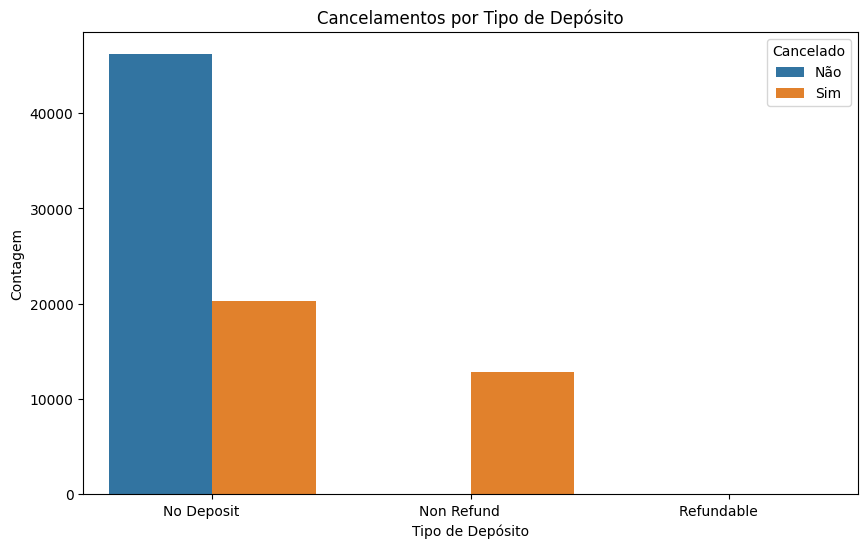

In [26]:
# Vamos analisar a relação entre o tipo de depósito e os cancelamentos
plt.figure(figsize=(10, 6))
sns.countplot(x='DepositType', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Tipo de Depósito')
plt.xlabel('Tipo de Depósito')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.show()


# Estratégia 4: Campanhas de marketing direcionadas

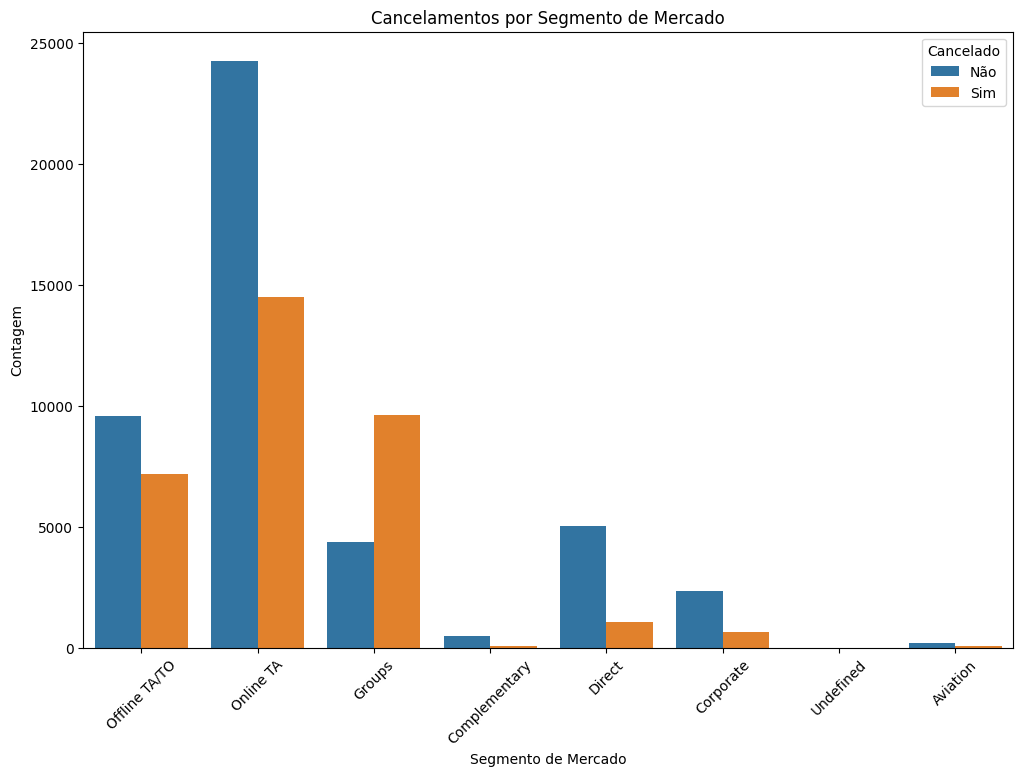

In [27]:

# Vamos explorar a distribuição dos segmentos de mercado e sua relação com os cancelamentos
plt.figure(figsize=(12, 8))
sns.countplot(x='MarketSegment', hue='IsCanceled', data=df)
plt.title('Cancelamentos por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.xticks(rotation=45)
plt.show()

# Estratégia 5: Ofertas especiais e incentivos para reservas antecipadas

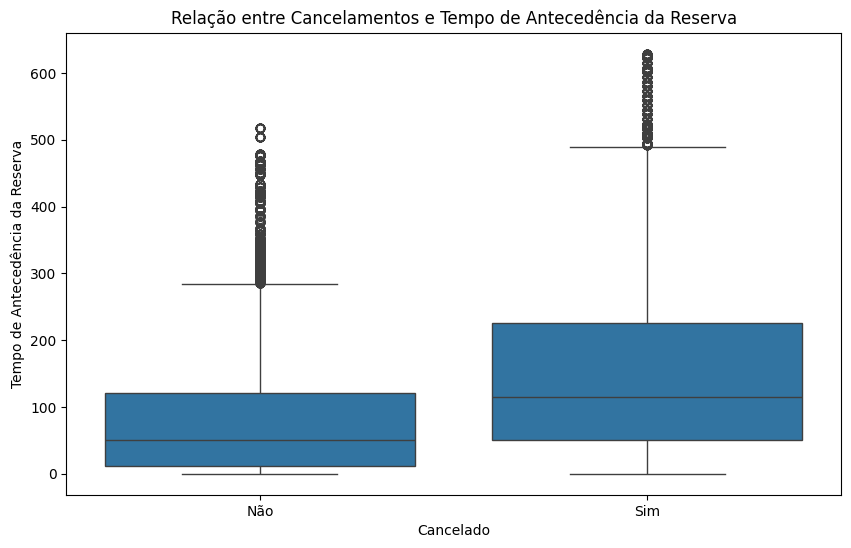

In [28]:

# Vamos investigar a relação entre o tempo de antecedência da reserva e os cancelamentos
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsCanceled', y='LeadTime', data=df)
plt.title('Relação entre Cancelamentos e Tempo de Antecedência da Reserva')
plt.xlabel('Cancelado')
plt.ylabel('Tempo de Antecedência da Reserva')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

#  vamos avaliar o desempenho de um modelo de machine learning para prever os cancelamentos no City Hotel (H2). Vamos usar um algoritmo de classificação para treinar o modelo com base nos dados históricos e, em seguida, avaliar sua precisão na previsão de cancelamentos.

**Preparação dos dados: selecionar e pré-processar os recursos relevantes para o modelo.**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Preparação dos dados
# Selecionar os recursos relevantes para o modelo
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'StaysInWeekendNights',
            'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country',
            'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
            'PreviousBookingsNotCanceled', 'ReservedRoomType', 'DepositType', 'CustomerType',
            'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

X = df[features]
y = df['IsCanceled']

In [40]:
from sklearn.impute import SimpleImputer

# Lidar com valores ausentes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo: 0.8146172562230957

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7520
           1       0.74      0.58      0.65      3166

    accuracy                           0.81     10686
   macro avg       0.79      0.75      0.76     10686
weighted avg       0.81      0.81      0.81     10686



Tivemos um acuracia no nosso modelo de 81% de acerto de certa forma para nosso problema teve acuracia alta e eficaz .

# **Conclusão**

Após uma imersão nos dados do City Hotel (H2), podemos concluir que o desafio de reduzir as altas taxas de cancelamento é uma jornada repleta de insights valiosos. Desde a análise inicial dos tipos de dados até a construção e avaliação de modelos preditivos, ficou evidente a complexidade e a importância de entender cada aspecto desse universo hoteleiro. Como em uma aventura, enfrentamos alguns obstáculos pelo caminho, mas com uma pitada de humor e muita determinação, conseguimos desbravar esse território e criar estratégias promissoras para mitigar os cancelamentos e elevar a eficiência do hotel. Este é apenas o começo de uma jornada emocionante rumo a um City Hotel mais resiliente e lucrativo. Prepare-se para mais descobertas e conquistas! 🚀🏨💼